# 3. Explore the Data

> "I don't know, what I don't know"

- Why do **visual exploration**?
- Understand Data Structure & Types
- Explore **single variable graphs** - Quantitative, Categorical
- Explore **dual variable graphs** - (Q & Q, Q & C, C & C)
- Explore **multi variable graphs**

In [1]:
# Import the two library we need, which is Pandas and Numpy
import pandas as pd
import numpy as np

In [2]:
#Read the csv file of 
df = pd.read_csv('MonthWiseMarketArrivals_clean.csv')

In [4]:
#Set the Index
df.index = pd.PeriodIndex(df.date, freq='M')
df = df.sort_index()

Lets load the libraries required for Visual Exploration

In [5]:
# Load the visualisation libraries - Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

## Which state have the highest quantity of sales?

In [7]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,January-1996
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,February-1996
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,March-1996
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,April-1996
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,May-1996


In [44]:
dfStates = df.groupby(['state', 'year'], as_index=False)['quantity'].sum()

In [45]:
dfStates.head()

,state,year,quantity
0,AP,2004,405170
1,AP,2005,149529
2,AP,2006,1017206
3,AP,2007,1159016
4,AP,2008,1033017


In [52]:
dfStates.index = pd.PeriodIndex(dfStates.year, freq='A')

In [53]:
dfStates.head()

,state,year,quantity
2004,AP,2004,405170
2005,AP,2005,149529
2006,AP,2006,1017206
2007,AP,2007,1159016
2008,AP,2008,1033017


In [66]:
dfStatesPivot = pd.pivot_table(df, values = "quantity", index = "year", columns = "state", aggfunc=sum)

In [81]:
dfStatesPivot.head()

state,AP,ASM,BH,BHR,DEL,GUJ,HP,HR,JH,JK,...,MP,MS,OR,PB,RAJ,TN,UP,UTT,WB,WHITE
year,,,,,,,,,,,,,,,,,,,,,
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2160538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3590220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,784253,NaN,NaN,NaN,NaN,...,NaN,4854460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,NaN,NaN,2818202,NaN,NaN,NaN,NaN,...,NaN,9273431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,NaN,NaN,NaN,1669466,NaN,NaN,NaN,NaN,...,NaN,12079263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
dfStatesPivot.sort_index(by = 'value')

/Users/amitkaps/Documents/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


KeyError: 'value'

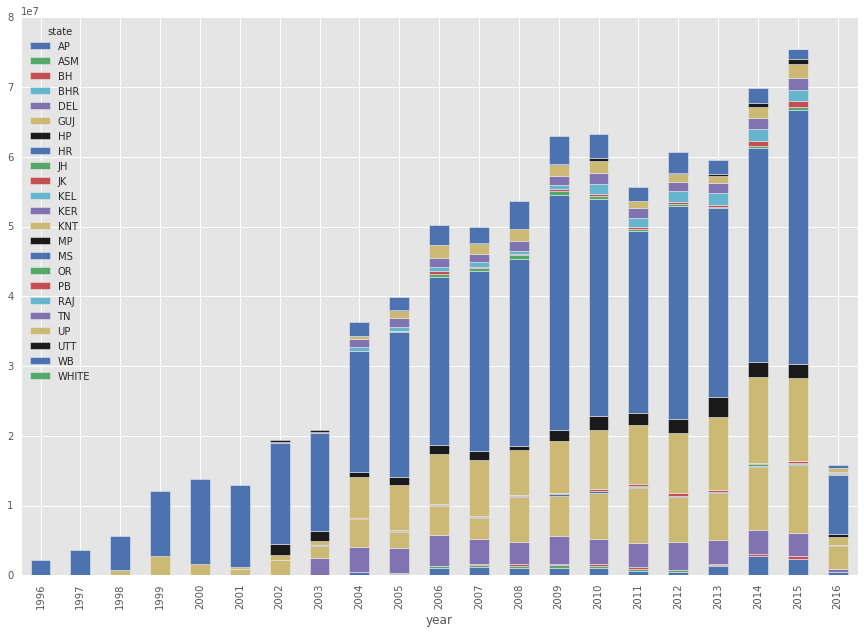

In [71]:
dfStatesPivot.plot(kind = "bar", stacked = True)

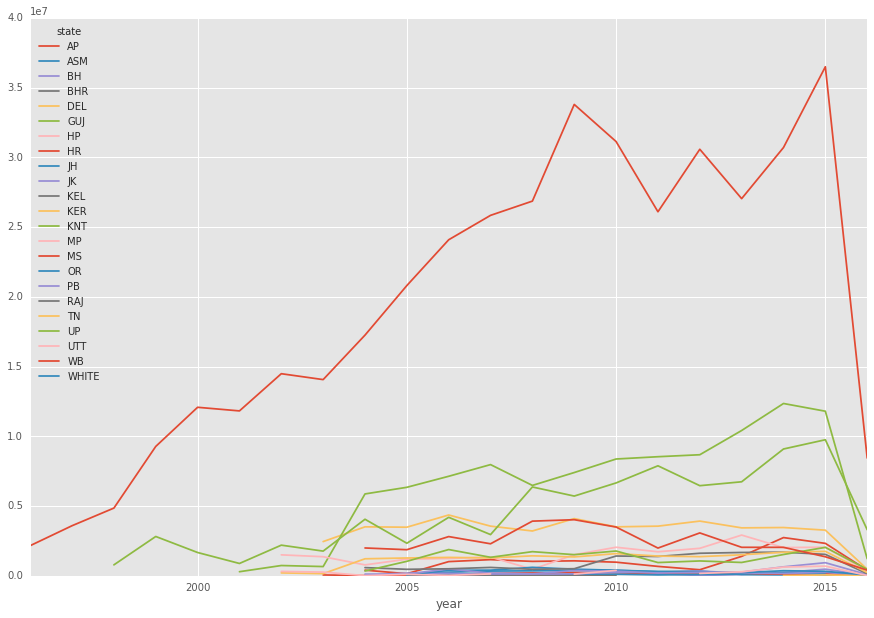

In [73]:
dfStatesPivot.plot(kind = "line")

In [9]:
df_bang = df[df["city"] == "BANGALORE"]
df_bang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,January-2004
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,February-2004
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,March-2004
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,April-2004
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,May-2004


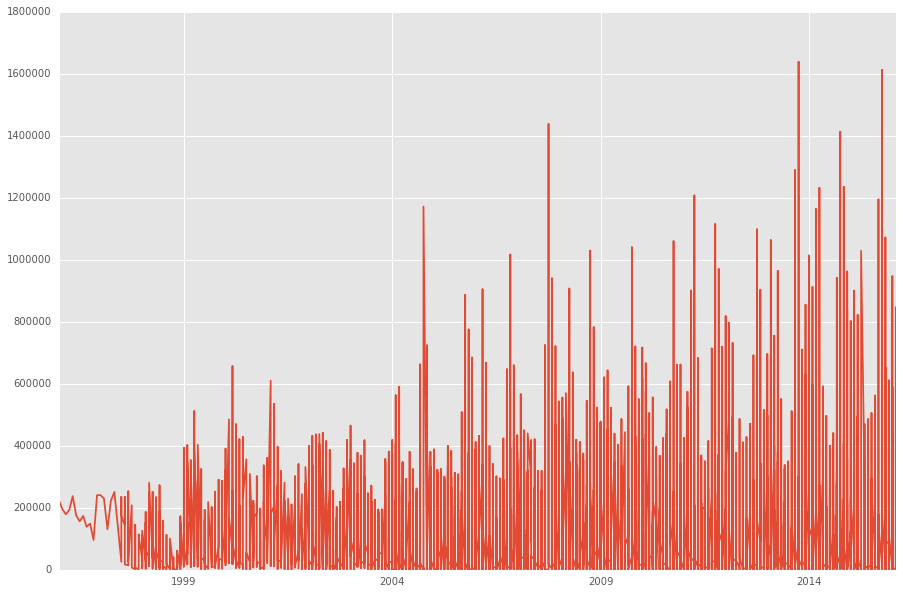

In [29]:
df.quantity.plot()

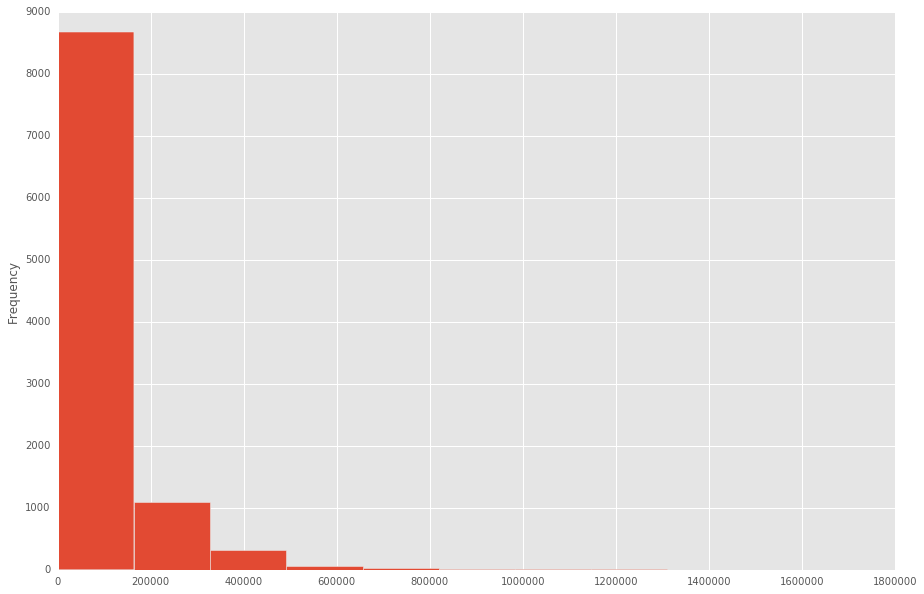

In [30]:
df['quantity'].plot(kind = "hist")

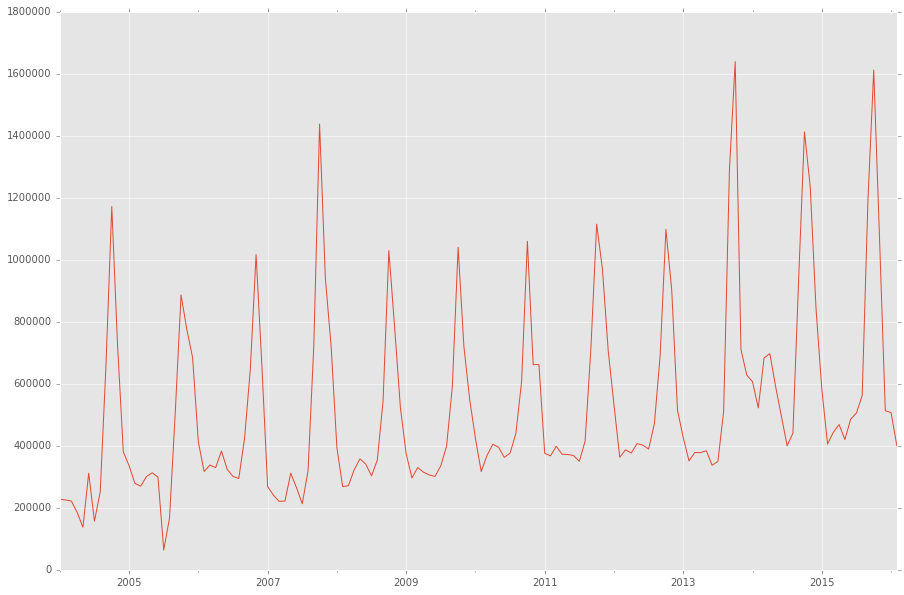

In [13]:
df_b['quantity'].plot()

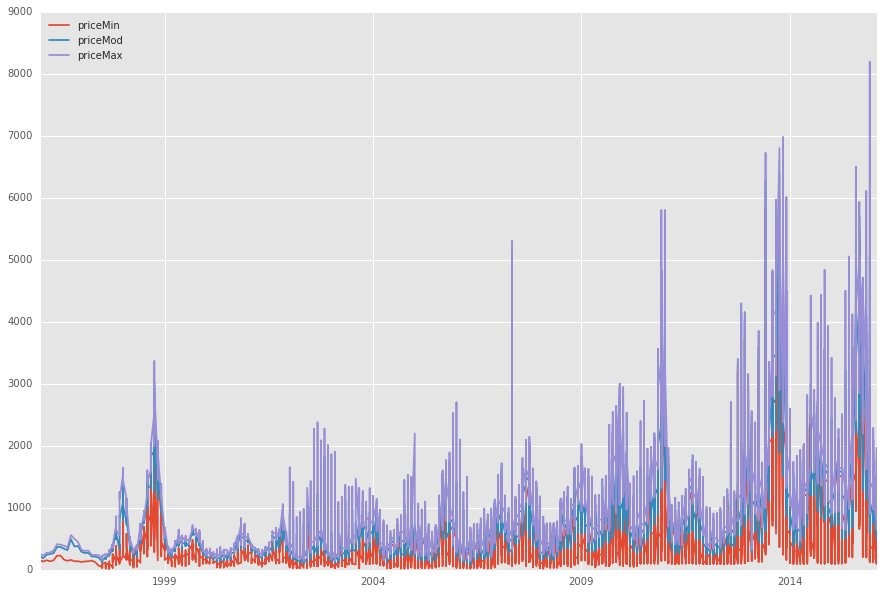

In [31]:
df[['priceMin', 'priceMod', 'priceMax']].plot()

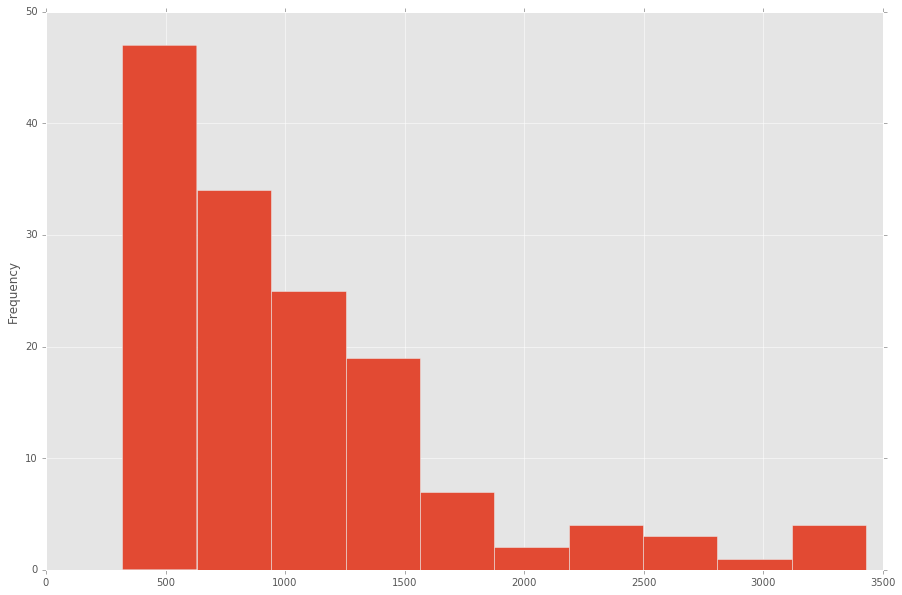

In [16]:
df_bang.priceMod.plot(kind = "hist")

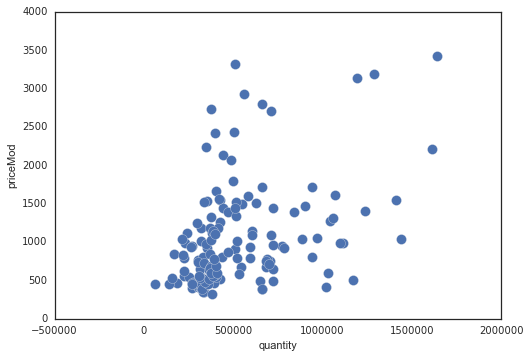

In [22]:
df_bang.plot(kind = 'scatter', y = 'priceMod', x = 'quantity', s = 100)

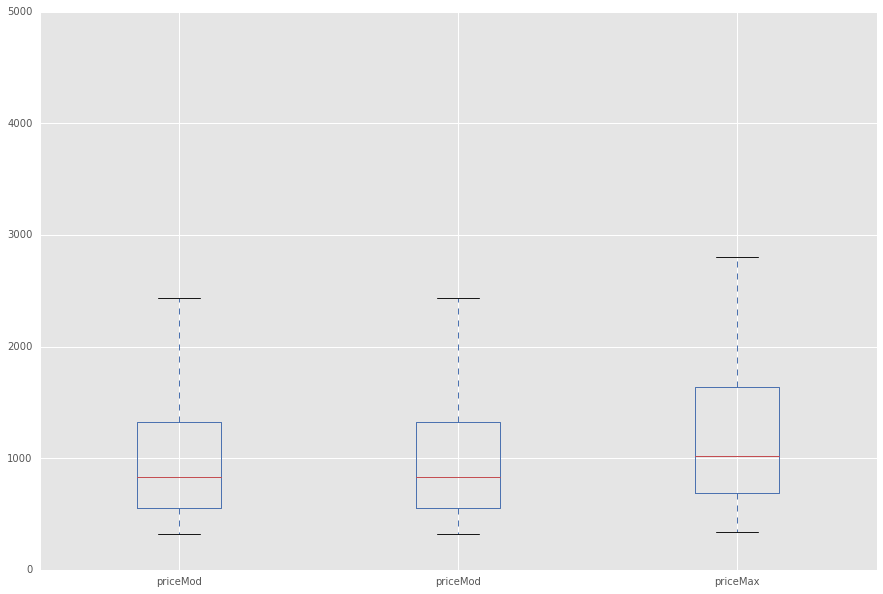

In [28]:
df_bang[['priceMod', 'priceMod', 'priceMax']].plot(kind = "box")

In [24]:
import seaborn as sns

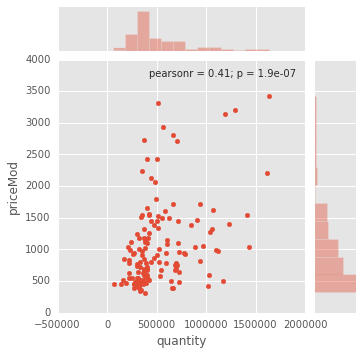

In [25]:
sns.jointplot(x="quantity", y="priceMod", data=df_bang, size=5)